<a href="https://colab.research.google.com/github/Ian-G27/Clase_MetodosNumericos/blob/main/Tarea4MetodosNumericos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Metodo de la Posicion Falsa**

**Buendia Alvarez Ian Diego**

**Metodos Numericos**


El programa que se hizo fue basado en el siguiente Pseudocodigo de la posicion falsa:

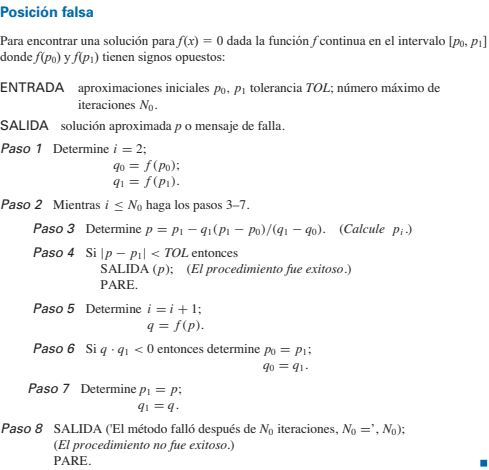

In [1]:
#librerias que seran utilizadas para este programa
import numpy as np
from sympy import symbols, sympify, lambdify, pi, N
from tabulate import tabulate

def posicion_falsa(f, p0, p1, TOL, N0):
    """
    Los parametros que se utilizaran en el programa:
    f --> Es la funcion para la cual se busca la raiz
    p0, p1 --> Puntos iniciales que acotan la raiz (f(p0) y f(p1) deben tener signos opuestos)
    TOL --> Tolerancia para la convergencia
    N0 --> Número maximo de iteraciones
    Lo que se retorna:
    p --> Solucion aproximada o mensaje de falla
    """
    #Primero se inicializara la lista para almacenar los resultados de cada iteracion
    tabla_resultados = []
    #Paso 1: Determine i = 2
    i = 1  #Comenzando en 1 en la tabla
    q0 = f(p0)
    q1 = f(p1)
    #Verificando que los signos son opuestos
    if q0 * q1 >= 0:
        return "Error: f(p0) y f(p1) deben tener signos opuestos"
    #Agregando los valores iniciales a la tabla
    tabla_resultados.append([i, p0, p1, "-", "-", q0, q1])
    #Paso 2:Mientras i<=N0 haga los pasos 3-7
    while i <= N0:
        #Paso 3:Determine p = p1 - q1(p1 - p0)/(q1 - q0)
        p = p1 - q1 * (p1 - p0) / (q1 - q0)
        q = f(p)
        #Calculamos el error estimado
        error = abs(p - p1)
        #Incrementando el contador para la proxima iteracion
        i += 1
        #Se debe añadir resultados a la tabla
        tabla_resultados.append([i, p0, p1, p, error, q0, q1])

        #Paso 4: Si |p - p1| < TOL entonces SALIDA (p)
        if error < TOL:
            #Imprimir la tabla de resultados
            headers = ["Iteracion", "p0", "p1", "p", "Error", "f(p0)", "f(p1)"]
            print("\nTabla de resultados:")
            print(tabulate(tabla_resultados, headers=headers, tablefmt="grid", floatfmt=".8f"))
            return p  #El procedimiento fue exitoso

        #Paso 6: Si q*q1 < 0 entonces se determinara p0 = p1; q0 = q1
        if q * q1 < 0:
            p0 = p1
            q0 = q1

        #Paso 7: Determinando p1 = p; q1 = q
        p1 = p
        q1 = q

    #Se imprimira la tabla de resultados en caso de la no convergencia
    headers = ["Iteracion", "p0", "p1", "p", "Error", "f(p0)", "f(p1)"]
    print("\nTabla de resultados:")
    print(tabulate(tabla_resultados, headers=headers, tablefmt="grid", floatfmt=".8f"))

    #Paso 8:SALIDA ("El metodo fallo despues de N0 iteraciones")
    return f"El metodo fallo despues de {N0} iteraciones"

def evaluar_expresion(expr_str):
    """
    ESe evaluara una expresion matematica y se devuelve su valor numerico.
    Asi se me permitira usar constantes como pi y expresiones como pi/4.
    """
    try:
        #Se intentara evaluar directamente como numero
        return float(expr_str)
    except ValueError:
        try:
            #Intentando evaluar como una expresion simbolica
            expr = sympify(expr_str)
            return float(N(expr))
        except Exception as e:
            raise ValueError(f"No se pudo evaluar la expresion: {expr_str}. Error: {e}")

def main():
    print("Metodo de Posicion Falsa para encontrar raices de una funcion")
    print("----------------------------------------------------------")
    #Le pedire al usuario que ingrese la funcion para que sea algo interactivo
    print("\nIngrese la funcion f(x) (use 'x' como variable):")
    print("Ejemplos de como ingresar funciones: x**3 - 6*x**2 + 11*x - 6, sin(x) - cos(x), cos(x) - x")
    func_str = input("f(x) = ")

    try:
        #Convertimos la cadena de entrada en una funcion ejecutable
        x = symbols('x')
        expr = sympify(func_str)
        f = lambdify(x, expr, 'numpy')

        #Prueba rapida para que se verifique que la funcion es valida
        f(1.0)
    except Exception as e:
        print(f"Error al analizar la funcion: {e}")
        return

    try:
        #Aqui se piden los puntos iniciales
        p0_str = input("\nIngrese el valor inicial p0 (se puede usar expresiones como 0.5, pi, pi/4): ")
        p1_str = input("Ingrese el valor inicial p1 (se puede usar expresiones como 0.5, pi, pi/4): ")

        #Se debe evaluar las expresiones
        try:
            p0 = evaluar_expresion(p0_str)
            p1 = evaluar_expresion(p1_str)
        except ValueError as e:
            print(f"Error: {e}")
            return

        #Se verifica que f(p0) y f(p1) tienen signos opuestos
        q0 = f(p0)
        q1 = f(p1)
        print(f"\nf({p0}) = {q0}")
        print(f"f({p1}) = {q1}")

        if q0 * q1 >= 0:
            print("Error: f(p0) y f(p1) deben tener signos opuestos.")
            return

        #Se pide tolerancia y el maximo de iteraciones
        TOL_str = input("\nIngrese la tolerancia (TOL, recomendado 1e-6): ")
        N0_str = input("Ingrese el numero maximo de iteraciones (N0): ")

        TOL = evaluar_expresion(TOL_str)
        N0 = int(evaluar_expresion(N0_str))

        #Por ultimo se ejecuta el metodo de la posicion falsa
        resultado = posicion_falsa(f, p0, p1, TOL, N0)

        if isinstance(resultado, float):
            print(f"\nLa raiz aproximada es: {resultado:.10f}")
            print(f"f({resultado:.10f}) = {f(resultado):.10e}")
        else:
            print(f"\n{resultado}")

    except ValueError as e:
        print(f"Error: {e}")
    except Exception as e:
        print(f"Error inesperado: {e}")

if __name__ == "__main__":
    main()

Metodo de Posicion Falsa para encontrar raices de una funcion
----------------------------------------------------------

Ingrese la funcion f(x) (use 'x' como variable):
Ejemplos de como ingresar funciones: x**3 - 6*x**2 + 11*x - 6, sin(x) - cos(x), cos(x) - x
f(x) = cos(x) - x

Ingrese el valor inicial p0 (se puede usar expresiones como 0.5, pi, pi/4): 0.5
Ingrese el valor inicial p1 (se puede usar expresiones como 0.5, pi, pi/4): pi/4

f(0.5) = 0.37758256189037276
f(0.7853981633974483) = -0.0782913822109007

Ingrese la tolerancia (TOL, recomendado 1e-6): 1e-6
Ingrese el numero maximo de iteraciones (N0): 10

Tabla de resultados:
+-------------+------------+------------+--------------------+-----------------------+-------------+-------------+
|   Iteracion |         p0 |         p1 | p                  | Error                 |       f(p0) |       f(p1) |
+=============+============+============+====================+=======================+=============+=============+
|           1 |

# Fin

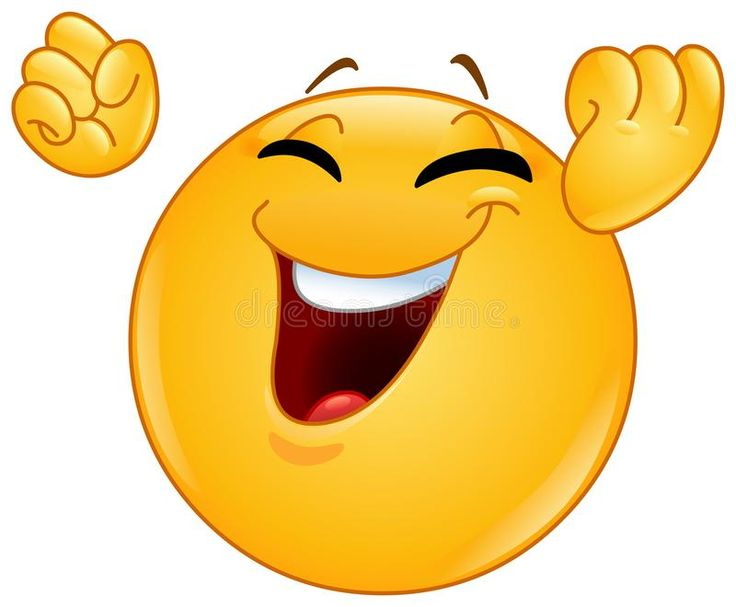